In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
adaptive = pd.read_csv('../bin/release/problems/bubble2D_adaptive.csv', header=0)
static = pd.read_csv('../bin/release/problems/bubble2D_static.csv', header=0)
adaptive.head()

,min_size,max_size,mean_size,n_cells,n_min,n_max,time,dt
0,0.000013,0.0004,0.000037,6506,3624,106,1.753480e-09,1.753480e-09
1,0.000013,0.0004,0.000034,7388,4264,106,3.501920e-09,1.748450e-09
2,0.000013,0.0004,0.000032,8108,4904,106,5.414370e-09,1.912450e-09
3,0.000013,0.0004,0.000031,8588,5544,106,7.210380e-09,1.796010e-09
4,0.000013,0.0004,0.000032,8108,4904,106,8.960370e-09,1.749990e-09


In [3]:
from scipy.interpolate import make_interp_spline

def smooth(x, y):
    B_spline_coeff = make_interp_spline(x, y)
    X_final = np.linspace(x.min(), x.max(), 200)
    return X_final, B_spline_coeff(X_final)

In [4]:
print(len(adaptive))
print(len(static))

1782
1821


In [5]:
static_cell_size = static['min_size'][0]
adaptive_cell_size = adaptive['min_size'].mean()
print(static_cell_size, adaptive_cell_size)
static_cell_size / adaptive_cell_size

1.25e-05 1.2500000000000002e-05


0.9999999999999999

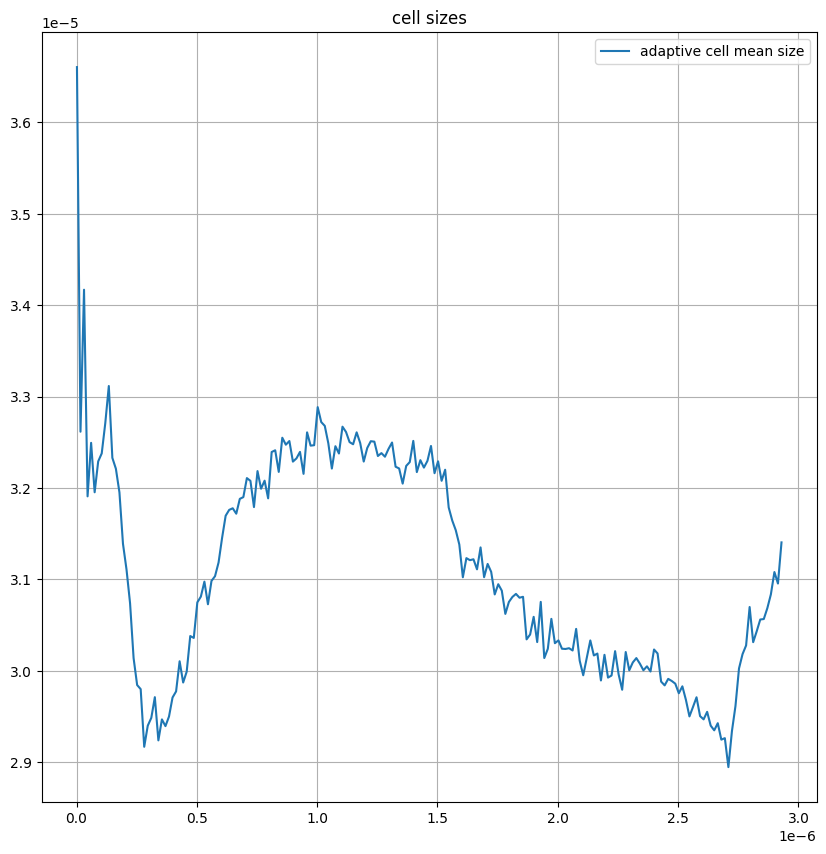

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(*smooth(adaptive['time'], adaptive['mean_size']), label='adaptive cell mean size')
# plt.plot(smooth(adaptive['time'], adaptive['min_size']), label='adaptive cell min size')
# plt.plot(smooth(static['time'], static['mean_size']), label='static cell size')
plt.title("cell sizes")
plt.grid()
plt.legend()
plt.show()

In [13]:
adaptive['n_max'].describe()

count    1782.000000
mean      113.923681
std        13.884816
min        88.000000
25%       102.000000
50%       113.000000
75%       123.000000
max       148.000000
Name: n_max, dtype: float64

In [8]:
static['n_cells'].describe()

count      1821.0
mean     204800.0
std           0.0
min      204800.0
25%      204800.0
50%      204800.0
75%      204800.0
max      204800.0
Name: n_cells, dtype: float64

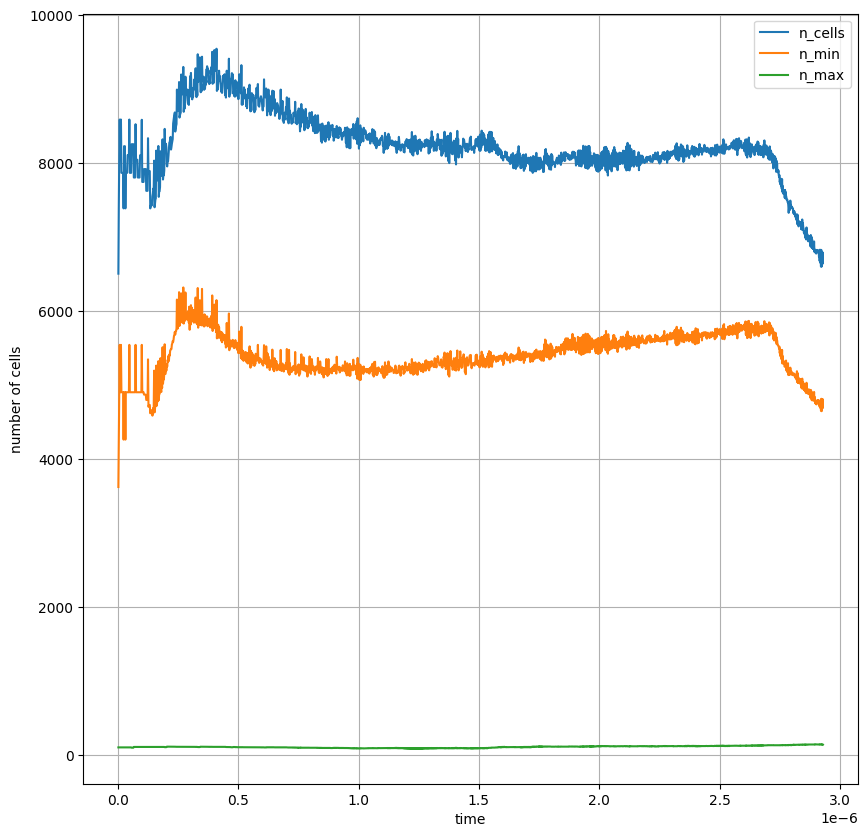

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(adaptive['time'], adaptive['n_cells'], label='n_cells')
plt.plot(adaptive['time'], adaptive['n_min'], label='n_min')
plt.plot(adaptive['time'], adaptive['n_max'], label='n_max')
plt.xlabel('time')
plt.ylabel('number of cells')
plt.grid()
plt.legend()
plt.show()

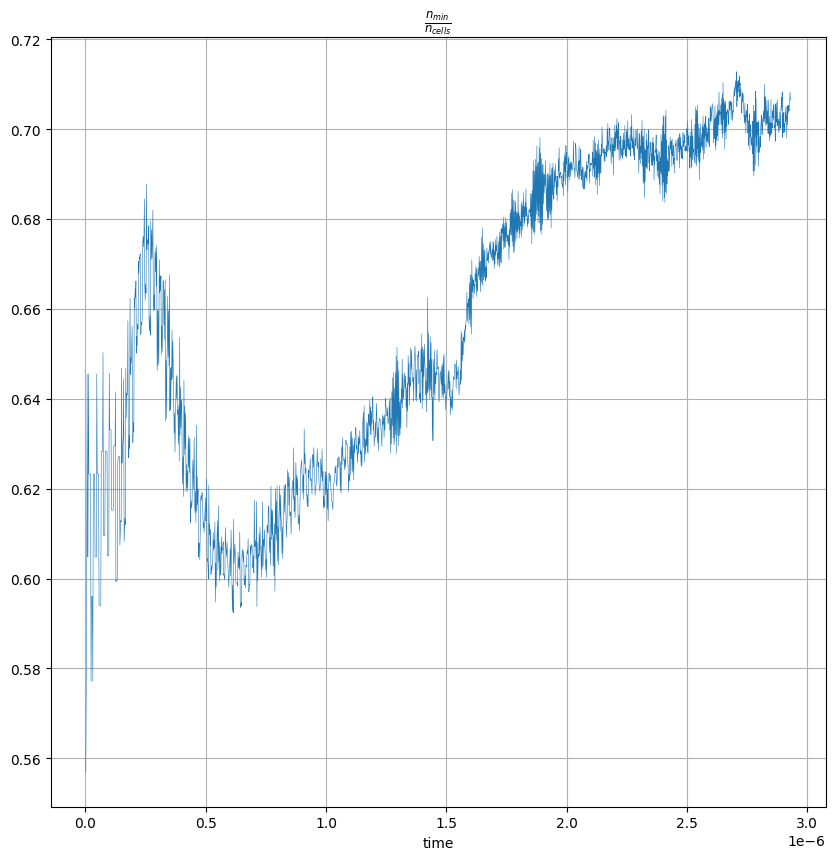

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(adaptive['time'], adaptive['n_min'] / adaptive['n_cells'], linewidth=0.4)
plt.title(r'$\frac{n_{min}}{n_{cells}}$')
plt.xlabel('time')
plt.grid()
plt.show()

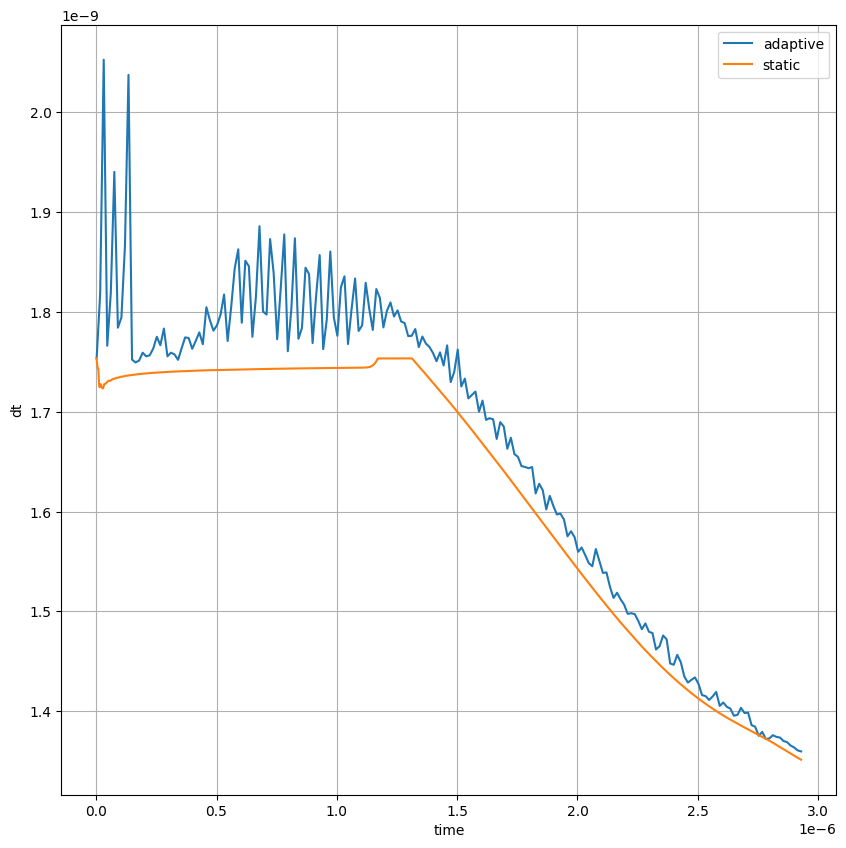

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(*smooth(adaptive['time'], adaptive['dt']), label='adaptive')
plt.plot(static['time'], static['dt'], label='static')
plt.ylabel('dt')
plt.xlabel('time')
plt.grid()
plt.legend()
plt.show()